# 데이터 준비

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
!ls '/gdrive/MyDrive/0. 인공지능 학습/아이펠 대전 3기/2. Exploration 수업/코드/8강'

character_images  ex2.ipynb  face_images  project8_2.ipynb
ex1.ipynb	  ex.ipynb   models	  project8.ipynb


In [3]:
import os
from glob import glob
from tqdm import tqdm_notebook

import matplotlib.pyplot as plt
import numpy as np

import cv2
import dlib

In [4]:
face_img_dir = '/gdrive/MyDrive/0. 인공지능 학습/아이펠 대전 3기/2. Exploration 수업/코드/8강/face_images'
char_img_dir = '/gdrive/MyDrive/0. 인공지능 학습/아이펠 대전 3기/2. Exploration 수업/코드/8강/character_images'
model_path = '/gdrive/MyDrive/0. 인공지능 학습/아이펠 대전 3기/2. Exploration 수업/코드/8강/models/shape_predictor_68_face_landmarks.dat'

In [5]:
face_img_paths = glob(os.path.join(face_img_dir, "*.*"))

face_img_paths

['/gdrive/MyDrive/0. 인공지능 학습/아이펠 대전 3기/2. Exploration 수업/코드/8강/face_images/1 (6680).jpg',
 '/gdrive/MyDrive/0. 인공지능 학습/아이펠 대전 3기/2. Exploration 수업/코드/8강/face_images/1 (6674).jpg',
 '/gdrive/MyDrive/0. 인공지능 학습/아이펠 대전 3기/2. Exploration 수업/코드/8강/face_images/1 (6764).jpg',
 '/gdrive/MyDrive/0. 인공지능 학습/아이펠 대전 3기/2. Exploration 수업/코드/8강/face_images/1 (6747).jpg',
 '/gdrive/MyDrive/0. 인공지능 학습/아이펠 대전 3기/2. Exploration 수업/코드/8강/face_images/1 (6857).jpg',
 '/gdrive/MyDrive/0. 인공지능 학습/아이펠 대전 3기/2. Exploration 수업/코드/8강/face_images/1 (6862).jpg',
 '/gdrive/MyDrive/0. 인공지능 학습/아이펠 대전 3기/2. Exploration 수업/코드/8강/face_images/1 (6861).jpg',
 '/gdrive/MyDrive/0. 인공지능 학습/아이펠 대전 3기/2. Exploration 수업/코드/8강/face_images/1 (6915).jpg',
 '/gdrive/MyDrive/0. 인공지능 학습/아이펠 대전 3기/2. Exploration 수업/코드/8강/face_images/1 (6908

In [6]:
plt.figure(figsize=(20, 30))
for idx, face_img_path in enumerate(tqdm_notebook(face_img_paths)):
    img_bgr = cv2.imread(face_img_path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    plt.subplot(6, 4, idx+1)
    plt.imshow(img_rgb)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

- 인종, 피부색, 배경, 얼굴 각도, 조명, 얼굴의 노출 정도 등을 고려하여 테스트 할 이미지들을 선정하였음.

In [7]:
detector_hog = dlib.get_frontal_face_detector()

In [8]:
plt.figure(figsize=(20, 30))
for idx, face_img_path in enumerate(tqdm_notebook(face_img_paths)):
    img_bgr = cv2.imread(face_img_path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    
    dlib_rects = detector_hog(img_rgb, 1)
    for dlib_rect in dlib_rects:
        l = dlib_rect.left()
        t = dlib_rect.top()
        r = dlib_rect.right()
        b = dlib_rect.bottom()
    cv2.rectangle(img_rgb, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

    plt.subplot(6, 4, idx+1)
    plt.imshow(img_rgb)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [9]:
landmark_predictor = dlib.shape_predictor(model_path)

In [10]:
plt.figure(figsize=(20, 30))
for idx, face_img_path in enumerate(tqdm_notebook(face_img_paths)):
    img_bgr = cv2.imread(face_img_path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    list_landmarks = []
    dlib_rects = detector_hog(img_rgb, 1)
    for dlib_rect in dlib_rects:
        l = dlib_rect.left()
        t = dlib_rect.top()
        r = dlib_rect.right()
        b = dlib_rect.bottom()
        
        points = landmark_predictor(img_rgb, dlib_rect)
        # face landmark 좌표를 저장해둡니다
        list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        list_landmarks.append(list_points)

    for landmark in list_landmarks:
        for point in landmark:
            cv2.circle(img_rgb, point, 2, (0, 255, 255), -1)

    cv2.rectangle(img_rgb, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

    plt.subplot(6, 4, idx+1)
    plt.imshow(img_rgb)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

- 얼굴 영역과 해당 영역의 랜드마크 점들을 검출한 결과 아래의 경우들에 대하여 검출에 실패함.
- 눈썹이 가려진 경우
- 조명이 너무 밝은 경우
- 얼굴이 기울어진 경우
- 안면 윤곽이 사진에 전부 나오지 않는 경우

# 캐릭터 사진 합성
- 사진을 합성하기 전에 아래의 사항들을 고려하겠음.
- 랜드마크의 번호를 확인하고 가장 적절한 사진의 위치를 지정할 것.
- 얼굴의 기울기에 따라 합성할 사진도 같이 기울어질 것.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/1 [00:00<?, ?it/s]

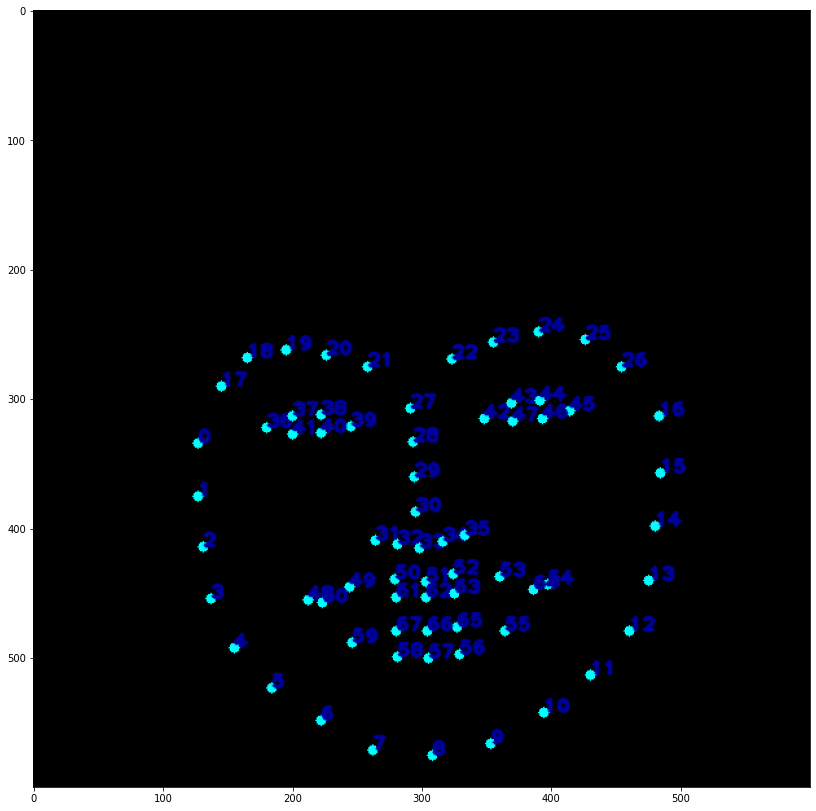

In [37]:
plt.figure(figsize=(100, 100))
for idx, face_img_path in enumerate(tqdm_notebook(face_img_paths[-1:])):
    img_bgr = cv2.imread(face_img_path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    list_landmarks = []
    dlib_rects = detector_hog(img_rgb, 1)
    for dlib_rect in dlib_rects:
        l = dlib_rect.left()
        t = dlib_rect.top()
        r = dlib_rect.right()
        b = dlib_rect.bottom()
        
        points = landmark_predictor(img_rgb, dlib_rect)
        landmark_img = np.zeros_like(img_rgb)

        list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        list_landmarks.append(list_points)

    for landmark in list_landmarks:
        for i, point in enumerate(landmark):
            cv2.circle(landmark_img, point, 4, (0, 255, 255), -1)
            font =  cv2.FONT_HERSHEY_PLAIN
            cv2.putText(landmark_img, str(i), point, font, 1,(0,0,155), 2, cv2.LINE_AA)

    plt.subplot(6, 4, idx+1)
    plt.imshow(landmark_img)
plt.show()

- 코의 랜드마크 인덱스는 27 ~ 35로 구성됨.
- 합성할 이미지를 코의 정중앙에 위치시키며 기울기 또한 적용하기 위하여 다음의 과정을 적용하겠음.
- 코의 가장 정중앙 위치는 30, 31, 33, 35 인덱스의 좌표의 중앙점을 사용.
- 코의 기울기는 (31, 35), (30, 33) 두 선분의 기울기를 사용.

스티커 사이즈 : (512, 512, 3)


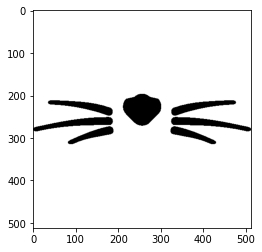

In [91]:
sticker_path = os.path.join(char_img_dir, "cat.png")
cat_sticker = cv2.imread(sticker_path)
plt.imshow(cat_sticker)
print("스티커 사이즈 :", cat_sticker.shape)

- 이미지 비율에 대한 함수 작성

[(118, 204) (504, 590)]
118 204 504 590
[(127, 334), (127, 375), (131, 414), (137, 454), (155, 492), (184, 523), (222, 548), (262, 571), (308, 575), (353, 566), (394, 542), (430, 513), (460, 479), (475, 440), (480, 398), (484, 357), (483, 313), (145, 290), (165, 268), (195, 262), (226, 266), (258, 275), (323, 269), (355, 256), (390, 248), (426, 254), (454, 275), (291, 307), (293, 333), (294, 360), (295, 387), (264, 409), (281, 412), (298, 415), (316, 410), (333, 405), (180, 322), (200, 313), (222, 312), (245, 321), (222, 326), (200, 327), (348, 315), (369, 303), (391, 301), (414, 309), (393, 315), (370, 317), (212, 455), (244, 445), (279, 439), (303, 441), (324, 435), (360, 437), (397, 443), (364, 479), (329, 497), (305, 500), (281, 499), (246, 488), (223, 457), (280, 453), (303, 453), (325, 450), (386, 447), (327, 476), (304, 479), (280, 479)]


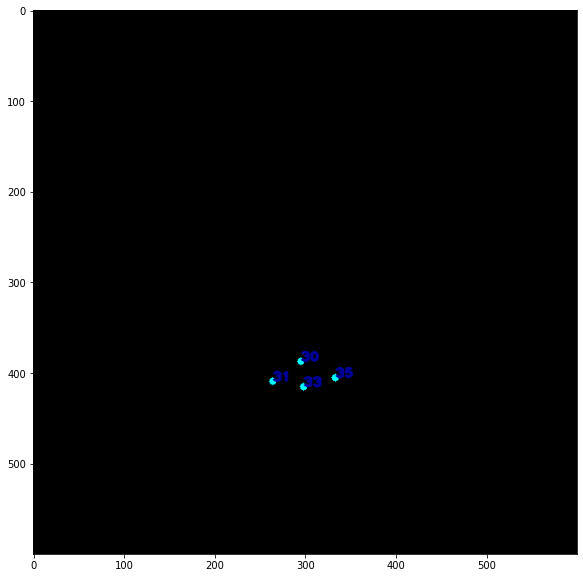

In [93]:
# 테스트 이미지 로딩 및 색상 변경
img = cv2.imread(face_img_paths[-1])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# plt.imshow(img)

# 얼굴 영역 검출기 생성 및 영역 좌표 생성
dlib_rects = detector_hog(img, 1)
dlib_rect = dlib_rects[0]

l = dlib_rect.left()
t = dlib_rect.top()
r = dlib_rect.right()
b = dlib_rect.bottom()

print(dlib_rect)
print(l, t, r, b)

# 랜드마크 검출 및 좌표 리스트 생성
landmarks = landmark_predictor(img, dlib_rect)
landmarks = list(map(lambda p: (p.x, p.y), points.parts()))
print(landmarks)

# 좌표 이미지 합성
landmark_img = np.zeros_like(img)
for i, point in enumerate(landmarks):
    cv2.circle(landmark_img, point, 4, (0, 255, 255), -1)
    font =  cv2.FONT_HERSHEY_PLAIN
    cv2.putText(landmark_img, str(i), point, font, 1,(0,0,155), 2, cv2.LINE_AA)

# plt.figure(figsize=(10, 10))
# plt.imshow(landmark_img)

# 각도 계산
landmark_img = np.zeros_like(img)
for i, point in enumerate(landmarks):
    if i ==  30 or i ==  31 or i ==  33 or i ==  35:
        cv2.circle(landmark_img, point, 4, (0, 255, 255), -1)
        font =  cv2.FONT_HERSHEY_PLAIN
        cv2.putText(landmark_img, str(i), point, font, 1,(0,0,155), 2, cv2.LINE_AA)

plt.figure(figsize=(10, 10))
plt.imshow(landmark_img)

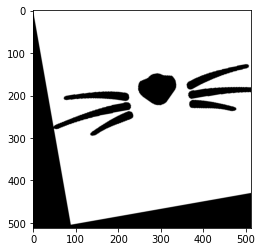

In [94]:
import cv2
import math
import numpy as np

img = resized_cat_sticker

rad = 10 * math.pi / 180	# 각도 설정

# np.array로 Affine 행렬 생성
affne = np.float32([[math.cos(rad), math.sin(rad), 0], [-math.sin(rad), math.cos(rad), 0]])


# m45 = np.float32( [[ np.cos(d45), -1* np.sin(d45), rows//2],
#                     [np.sin(d45), np.cos(d45), -1*cols//4]])
# m90 = np.float32( [[ np.cos(d90), -1* np.sin(d90), rows],
#                     [np.sin(d90), np.cos(d90), 0]])

result = cv2.warpAffine(img, affne, (0, 0))

# cv2.imshow('original', img)
plt.imshow(result)
# plt.imshow(img)

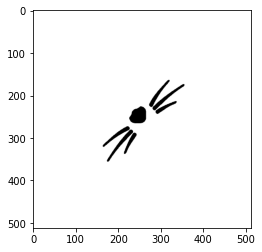

In [99]:
resized_cat_sticker = cat_sticker
# plt.imshow(resized_cat_sticker)

rows,cols = resized_cat_sticker.shape[0:2]
m45 = cv2.getRotationMatrix2D((cols/2,rows/2),45,0.5) 
img45 = cv2.warpAffine(resized_cat_sticker, m45,(cols, rows), borderValue=(255, 255, 255))

plt.imshow(img45)

In [ ]:
def cal_resized_img_shape(sticker, landmarks):
    nose_left = landmarks[31]
    nose_right = landmarks[35]
    nose_top = landmarks[30]
    nose_bottom = landmarks[33]

    nose_center = 
    pass


    
    for landmark in list_landmarks:
        for i, point in enumerate(landmark):
            cv2.circle(landmark_img, point, 4, (0, 255, 255), -1)
            font =  cv2.FONT_HERSHEY_PLAIN
            cv2.putText(landmark_img, str(i), point, font, 1,(0,0,155), 2, cv2.LINE_AA)

- 이미지 회전에 대한 함수 작성

In [ ]:
def cal_rotate_angle():
    pass

In [38]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # 코의 index는 30 입니다
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.height()//2
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(295, 387)
(x,y) : (295,194)
(w,h) : (387,387)


In [13]:
refined_x = x - w // 2
refined_y = y - h
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (102,-193)


In [14]:
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (102,0)


In [15]:
# 길어서 복잡해 보이지만 img_show[from:to] 형식입니다
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
print("슝~")

NameError: ignored

In [ ]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
plt.figure(figsize=(20, 30))
for idx, face_img_path in enumerate(tqdm_notebook(face_img_paths[:1])):
    img_bgr = cv2.imread(face_img_path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    list_landmarks = []
    dlib_rects = detector_hog(img_rgb, 1)
    print("dlib rects 출력",dlib_rects)
    for dlib_rect in dlib_rects:
        print("dlib rect 출력",dlib_rect)
        l = dlib_rect.left()
        t = dlib_rect.top()
        r = dlib_rect.right()
        b = dlib_rect.bottom()
        
        points = landmark_predictor(img_rgb, dlib_rect)
        print("points 출력",points)
        print(points.parts())
        # print(points)
        # for point in points:
        #     print(point,"\n")
        # face landmark 좌표를 저장해둡니다
        list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        list_landmarks.append(list_points)

    for landmark in list_landmarks:
        for point in landmark:
            cv2.circle(img_rgb, point, 4, (0, 255, 255), -1)

    cv2.rectangle(img_rgb, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

    plt.subplot(6, 4, idx+1)
    plt.imshow(img_rgb)
plt.show()